# Hypothesis Testing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# sembuh dari covid berkat obat A
treatment = [ 28.44,  32.32,  31.22,  29.58,  30.34,  30.76,  29.21,  30.4 ,
              31.12,  31.78,  27.58,  31.57,  35.73,  30.43,  30.31,  30.32,
              29.18,  29.52,  29.22,  31.56]

# sembuh dari covid tanpa obat A
control = [ 33.51,  30.63,  32.38,  32.52,  29.41,  30.93,  49.78,  28.96,
            35.77,  31.42,  30.76,  30.6 ,  23.64,  30.54,  47.78,  31.98,
            34.52,  32.42,  31.32,  40.72]

Hipotesis

H0 : (miu1 = miu2 -> m1-m2 = 0) Tidak ada perbedaan signifikan antara pemberian obat A ataupun tidak dalam penyembuhn covid-19

H1 : (miu1 != miu2 ->mm1-m2 != 0) Ada perbedaan signifikan antara pemberian obat A ataupun tidak dalam penyembuhn covid-19

In [3]:
#Hitung selisih data sampel (ground truth)
#Melihat perbedaan rata-rata treatment dengan control
ground_truth = np.abs(np.mean(treatment) - np.mean(control)) #nilai treatment lebih kecil dari contol nilai nya negatif, biar positif pakai abs
ground_truth 
#hasilnya secara rata-rata berbeda 3 hari

2.9499999999999993

Data yang sebenarnya

20 orang treatment dikasih obat A

20 orang control tidak dikasih obat A

terus ketika dihitung selisihnya 3 hari sembuh dari covid. Petanyaannya apakah 3 hari ini sebuah kebetulan?

h0 : sama antara obat A 

h1 : tidak sama

Lalu kita akan cari p-value nya, untuk menghitung p-value adalah menggunakan resampling kemudian dilihat misalkan hasilnya data-data nya yang memiliki selisih 3 hari berati p-value semakin besar/semakin menguatkan bahwa H0 benar. Namun jika tidak banyak lebih dari 3 hari, berarti p-value semakin kecil/melemahkan h0 sehingga bisa kita tolak.

pertanyaan selanjutnya bagaimana cara melakukan resampling dengan jumlah data yangg sedikit ini? caranya adalah kumpulkan atau menjadikan satu datanya menjadi 40. lalu 40 data diacak, kemudian diambil 20 per 20 masing-masingnya. 1 kali sampling sebanyak 20 data tapi acak tanpa kita ketahui mana yang dikasih obat A dan tidak dikasih obat A. Tetapi walaupun random, kita tetap mengangap 20 data pertama sebagai treatment dan 20 data selanjutnya sebagai control. Lalu di hitung nilai rata-ratanya, dari 1 sampling pengacakan pertama. Hingga dilanjutkan sampling ke 2, hingga ke 3 dan seterusnya sampai sampling 100 kali.

100 sampling yang dilakukan, dilihat hasilnya hanya ada 1 sample yang selisihnya lebih dari 3 atau sama dengan 3. Maka selisih 3 hari ini bukan sebuah kebetulan, bearti memang kasus yang khusus yang 1 sampel lebih dari 3 hari, sampel lain kurang dari 3 hari. Berarti 1 sampel yang nilainya lebih dari 3 hari merupakan probabilitas dari terjadinya kejadian ini. Maka p-valuenya 1/100 = 0.01.

sehingga artinya pemberian obat A lebih dari 3 hari sembuh bukan suatu kebetulan tetapi emang obat tersebut memiliki pengaruhnya atau efek covid bisa sembuh lebih cepat.

keputusanya Tolak ho, h1 di terima

In [4]:
#Untuk membuktikan perbedaan 3 hari ini kebetulan atau signifikan di pakai permutasi test
#caranya dengan mengacak-acak data baru dilihat jika banyak hasilnya lebih dari 3 hari berarti kebetulan bukan signifikan

#mengabungkan data treatment dan control
concat = np.concatenate([treatment,control])
concat

array([28.44, 32.32, 31.22, 29.58, 30.34, 30.76, 29.21, 30.4 , 31.12,
       31.78, 27.58, 31.57, 35.73, 30.43, 30.31, 30.32, 29.18, 29.52,
       29.22, 31.56, 33.51, 30.63, 32.38, 32.52, 29.41, 30.93, 49.78,
       28.96, 35.77, 31.42, 30.76, 30.6 , 23.64, 30.54, 47.78, 31.98,
       34.52, 32.42, 31.32, 40.72])

In [6]:
# liat baru untuk mengumpulkan selisih dari hasil resample
diff = []
p = 100 #Melakukan resample sebanyak 100 kali atau pengacakan 100 kali yang kemudian dihitung rata-rata serta selisihnya
np.random.seed(46) #reproduciable, artinya seed hasilnya sama dengan yang lain yang random nya 46 atau hasil 1 dengan 2 orang sama

for i in range(p): #melakukan looping sebanyak p
  #acak data concat gabungan treatment dan control
  np.random.shuffle(concat)
  #Lalu kita ambil 20 data awal/pertama di anggap sebagai treatment
  treatment_p = concat[:20] #indeks pertama sampai duapuluh
  #Lalu kita ambil 20 data akhir/kedua di anggap sebagai control
  control_p = concat[20:] #indeks 20 sampai data terakhir
  #hitung selisih rata-rata absolute
  d = np.abs(np.mean(treatment_p)-np.mean(control_p))
  #simpan ke list diff
  diff.append(d) #hasil d di simpan kedalam diff

In [7]:
#Bisa dilihat hasilnya ada yang 2 hari atau 1 hari
#Dari data-data yang muncul kemudian harus dibandingkan dengan hasil ground_truth, apakah ada lebih dari 3 hari? 
#Jika hasilnya sedikit berarti bukan sebuah kebutulan melainkan memang ada efek obat A nya
diff

[0.0919999999999952,
 2.230000000000004,
 2.104999999999986,
 1.5609999999999893,
 2.966999999999995,
 0.04999999999999716,
 0.32700000000000173,
 3.674000000000003,
 2.3399999999999928,
 1.8749999999999964,
 0.13599999999999568,
 0.612000000000009,
 1.2369999999999948,
 1.5260000000000034,
 1.1239999999999988,
 2.7870000000000026,
 1.0539999999999914,
 0.5470000000000113,
 0.22500000000000853,
 0.11900000000000688,
 0.36099999999999355,
 2.0129999999999946,
 2.8019999999999996,
 0.6679999999999993,
 0.2859999999999978,
 0.279000000000007,
 0.13300000000000978,
 1.6449999999999925,
 1.502999999999986,
 0.769000000000009,
 1.0429999999999993,
 0.17799999999999372,
 2.9450000000000003,
 1.5949999999999953,
 1.9609999999999843,
 0.4660000000000011,
 1.4870000000000019,
 2.4610000000000056,
 3.681000000000008,
 0.8070000000000022,
 1.6950000000000038,
 2.2530000000000037,
 1.1960000000000015,
 0.382000000000005,
 1.5719999999999885,
 1.6160000000000032,
 1.6969999999999956,
 0.741000000000

In [8]:
#Melihat berapa banyak yang hasil diff > ground_truth
len(np.where(diff >= ground_truth))
#Hasilnya cuma 1 data yang lebih dari ground_truth

1

In [10]:
#Ingin melihat data keberapa yang nilai diff lebih dari ground_truth
np.where(diff >= ground_truth)[0] # ada 4 data ke 4, 7, 38, 55 yang lebih besar atau sama dengan 3

array([ 4,  7, 38, 55])

In [11]:
diff[4]

2.966999999999995

In [12]:
diff[7]

3.674000000000003

In [13]:
diff[38]

3.681000000000008

In [14]:
diff[55]

3.024999999999995

indeks ke 4, 7, 38 dan 55 memiliki nilai diff nya seperti ground_truth yaitu 3 hari 

In [16]:
#Maka nilai p-value nya adalah
p_value = len(np.where(diff >= ground_truth)[0]) / p
p_value
#Nilai p-valuenya 0,04 berarti menolak h0, ada perbedaan dalam pemberian obat A

0.04

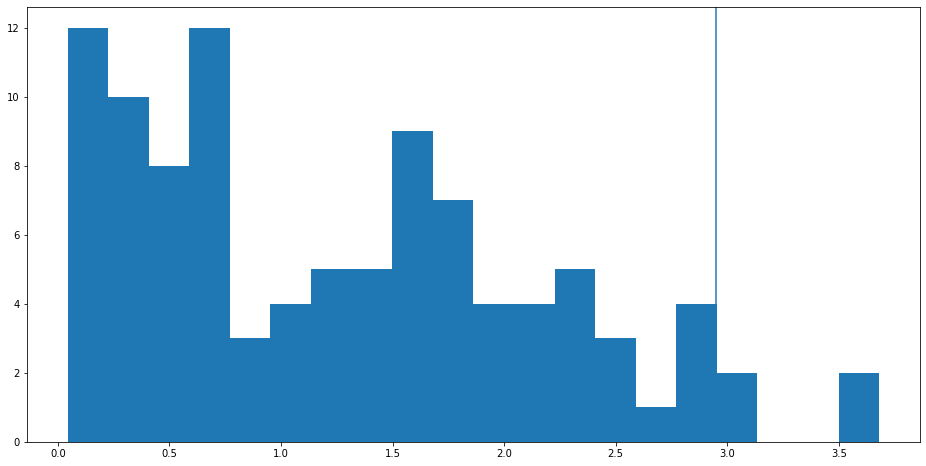

In [17]:
#Digambarkn dalam bentuk histogram
plt.figure(1, figsize=(16,8));
plt.hist(diff, bins = 20);
plt.axvline(x=ground_truth);

Pengacakan 100 kali kemudian di hitung rata-rata dan selisihnya, pada masing-masing sampling eksperimen nilai ground_truth. Hanya ada 4 data yang nilainya lebih dari ground_truth (histogram sebelah kanan da 4 data lebih dari ground_truth) artinya kemungkinan sebuah kebetulan antara Treatment dan contol hanya 4 % dari pengacakan sebelumnya yang lebih dari 3 hari hanya ada 4 sampel. maka kebetulan nya itu sangat kecil, sehingga menolak H0 antara pasien yang dikasih obat A dan tidak itu ada perbedaannya (statistice significen)

Ngak harus 100 resampling, tapi semakin banyak semakin meyakinkan

In [18]:
#Nilai random dalam python, itu subrandom. Atau randomnya itu bisa di atur 
np.random.seed(1) #pakai seed itu agar nilai nya rando di berbagai komputer sama persis, jika tidak pakai seed maka hasil antar komputer berbeda
np.random.random_integers(10, size=(10,))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 6,  9, 10,  6,  1,  1,  2,  8,  7, 10])

# Distribusi Normal

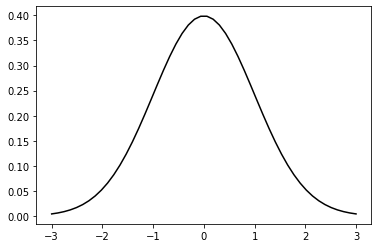

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#PDF Normal
x = np.linspace(-3, 3)
p = norm.pdf(x, 0, 1)

plt.plot(x, p, 'k');

(array([ 1.,  4.,  4.,  3.,  7.,  4.,  9.,  9., 10., 14., 13., 26., 20.,
        27., 23., 22., 15.,  7.,  8.,  5.,  6.,  5.,  3.,  1.,  4.]),
 array([146.36531395, 148.30046916, 150.23562436, 152.17077957,
        154.10593477, 156.04108998, 157.97624518, 159.91140039,
        161.84655559, 163.7817108 , 165.716866  , 167.65202121,
        169.58717641, 171.52233162, 173.45748682, 175.39264203,
        177.32779723, 179.26295244, 181.19810765, 183.13326285,
        185.06841806, 187.00357326, 188.93872847, 190.87388367,
        192.80903888, 194.74419408]),
 <a list of 25 Patch objects>)

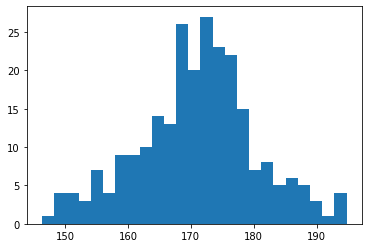

In [ ]:
data = np.random.normal(170, 10, 250)
plt.hist(data, bins=25)

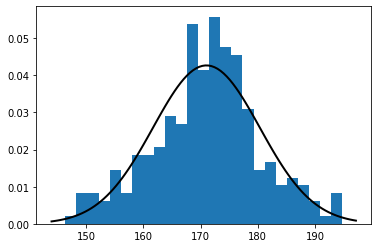

In [ ]:
mu = data.mean()
std = data.std()

plt.hist(data, bins=25, density = True);
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

In [ ]:
np.linspace(0, 1, 10) #

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])